In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange
from pystackreg import StackReg
import multiprocessing as mp
import timeit
from tqdm import tqdm
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 256


In [2]:
# need to change
ipts="34073"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [3]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['2025_02_27_Aem1IC_Sus_40C_40CRH_100rpm_100sccm',
 '2025_02_27_Aem1IC_Sus_40C_dry2_100rpm_100sccm',
 '2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_wet_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_40CRH_wet_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_wet_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_dry_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_wet_100rpm_100sccm',
 '2025_03_01_AEM1IC

In [4]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
ob_scan_list = sorted(os.listdir(ob_loc))
ob_scan_list

['2025_02_27_Aem1IC_Sus_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_AEM1IC_P75T_DI_Sus_40C_post_operando_dry_100rpm_100sccm',
 '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_operando_40CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_post_operando_D2O_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_post_operando_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_o

In [5]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/dc"
dc_scan_list = sorted(os.listdir(dc_loc))
dc_scan_list

['2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_03_04_water_calibration']

In [6]:
###################### need to change start
sample_name = "2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm"
scan_dir = os.path.join(scan_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2025_02_27_Aem1IC_Sus_40C_open_beam_100rpm_100sccm")
dc_dir = os.path.join(dc_loc, "2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm")
# ct_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# ob_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# dc_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
ob_name = "*OB*" # Will not be used if follows the default file structure
dc_name = "*DC*" # Will not be used if follows the default file structure
gamma_diff = 20
###################### need to change end

# Sort and filter scan files

In [7]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
print(len(fname_list))
fname_list

52


['dry01_0300_0001.tiff',
 'dry01_0300_0002.tiff',
 'dry01_0300_0003.tiff',
 'dry01_0300_0004.tiff',
 'dry01_0300_0005.tiff',
 'dry01_0300_0007.tiff',
 'dry01_0300_0009.tiff',
 'dry01_0300_0014.tiff',
 'dry01_0300_0018.tiff',
 'dry01_0300_0023.tiff',
 'dry01_0300_0024.tiff',
 'dry01_0300_0028.tiff',
 'dry01_0300_0036.tiff',
 'dry01_0300_0038.tiff',
 'operando01_0300_0001.tiff',
 'operando01_0300_0002.tiff',
 'operando01_0300_0003.tiff',
 'operando01_0300_0004.tiff',
 'operando01_0300_0005.tiff',
 'operando01_0300_0006.tiff',
 'operando01_0300_0007.tiff',
 'operando01_0300_0008.tiff',
 'operando01_0300_0009.tiff',
 'operando01_0300_0010.tiff',
 'operando01_0300_0011.tiff',
 'operando01_0300_0012.tiff',
 'operando01_0300_0013.tiff',
 'operando01_0300_0014.tiff',
 'operando01_0300_0015.tiff',
 'operando01_0300_0016.tiff',
 'operando01_0300_0017.tiff',
 'operando01_0300_0018.tiff',
 'operando01_0300_0019.tiff',
 'operando01_0300_0020.tiff',
 'operando01_0300_0021.tiff',
 'operando01_0300_00

In [8]:
to_rmv = [
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)

52
52


In [9]:
ob_list = os.listdir(ob_dir)
# fname_list.pop(0)
ob_list.sort()
print(len(ob_list))
# ob_list = ob_list[:3]
ob_list

5


['OB_0300_0001.tiff',
 'OB_0300_0002.tiff',
 'OB_0300_0003.tiff',
 'OB_0300_0004.tiff',
 'OB_0300_0005.tiff']

In [10]:
to_rmv = [
]
ob_list = rocku.remove_fnames(ob_list, to_rmv)

5
5


In [11]:
dc_list = os.listdir(dc_dir)
# fname_list.pop(0)
dc_list.sort()
print(len(dc_list))
dc_list

5


['DC_0300_0046.tiff',
 'DC_0300_0047.tiff',
 'DC_0300_0048.tiff',
 'DC_0300_0049.tiff',
 'DC_0300_0050.tiff']

In [12]:
to_rmv = [
]
dc_list = rocku.remove_fnames(dc_list, to_rmv)

5
5


In [13]:
scan_exposure_list = rocku.get_exposure_list(fname_list)
ob_exposure_list = rocku.get_exposure_list(ob_list)
dc_exposure_list = rocku.get_exposure_list(dc_list)
exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
exposure_list

['_0300_']

In [14]:
_fname_list = rocku.filter_list(fname_list, exposure_list[0])
_fname_list

['dry01_0300_0001.tiff',
 'dry01_0300_0002.tiff',
 'dry01_0300_0003.tiff',
 'dry01_0300_0004.tiff',
 'dry01_0300_0005.tiff',
 'dry01_0300_0007.tiff',
 'dry01_0300_0009.tiff',
 'dry01_0300_0014.tiff',
 'dry01_0300_0018.tiff',
 'dry01_0300_0023.tiff',
 'dry01_0300_0024.tiff',
 'dry01_0300_0028.tiff',
 'dry01_0300_0036.tiff',
 'dry01_0300_0038.tiff',
 'operando01_0300_0001.tiff',
 'operando01_0300_0002.tiff',
 'operando01_0300_0003.tiff',
 'operando01_0300_0004.tiff',
 'operando01_0300_0005.tiff',
 'operando01_0300_0006.tiff',
 'operando01_0300_0007.tiff',
 'operando01_0300_0008.tiff',
 'operando01_0300_0009.tiff',
 'operando01_0300_0010.tiff',
 'operando01_0300_0011.tiff',
 'operando01_0300_0012.tiff',
 'operando01_0300_0013.tiff',
 'operando01_0300_0014.tiff',
 'operando01_0300_0015.tiff',
 'operando01_0300_0016.tiff',
 'operando01_0300_0017.tiff',
 'operando01_0300_0018.tiff',
 'operando01_0300_0019.tiff',
 'operando01_0300_0020.tiff',
 'operando01_0300_0021.tiff',
 'operando01_0300_00

In [15]:
######### Scan
_scan_raw = rocku.read_tiff_stack(scan_dir, _fname_list)
print(_scan_raw.shape)

52


(52, 6300, 6100)


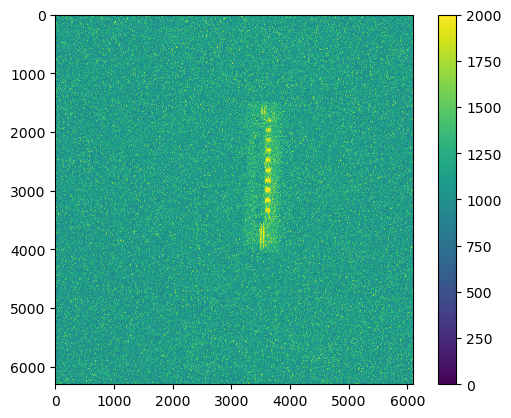

In [16]:
_scan_min = np.min(_scan_raw, axis=0)
plt.imshow(_scan_min, vmin=0, vmax=2000)
plt.colorbar()
plt.show()

ROI:


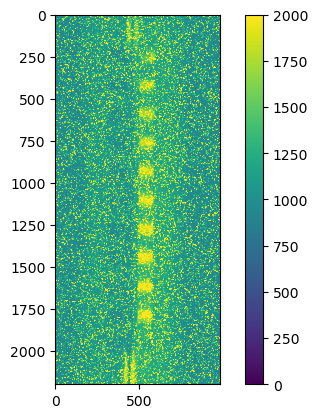

In [17]:
###################### need to change start
crop = True
# crop = False
crop_left = 3090#3290#320
crop_right = 4070#3770#1080
crop_top = 1550
crop_bottom = 3750
# crop_left = 2500
# crop_right = 4500
# crop_top = 200
# crop_bottom = 2350
###################### need to change end
# scan_crop = rocku.crop(scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
_scan_crop_min = rocku.crop(_scan_min, crop_left, crop_right, crop_top, crop_bottom, crop)
print("ROI:")
plt.imshow(_scan_crop_min, vmin=0, vmax=2000)
plt.colorbar()
plt.show()

# Normalize the selected list

In [18]:
scan_list = sorted(os.listdir(scan_loc))
scan_list

['2025_02_27_Aem1IC_Sus_40C_40CRH_100rpm_100sccm',
 '2025_02_27_Aem1IC_Sus_40C_dry2_100rpm_100sccm',
 '2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_wet_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_40CRH_wet_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_wet_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_dry_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_wet_100rpm_100sccm',
 '2025_03_01_AEM1IC

In [19]:
to_rmv = [
    # '2025_02_27_Aem1IC_Sus_40C_40CRH_100rpm_100sccm',
    #  '2025_02_27_Aem1IC_Sus_40C_dry2_100rpm_100sccm',
    #  '2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C01_40C_40CRH_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C01_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C03_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C03_40C_wet_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C08_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_40CRH_wet_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_wet_100rpm_100sccm',
    # '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_100rpm_100sccm',
    # '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm',
    # '2025_03_01_Aem1IC_Aem_C02_40C_dry_100rpm_100sccm',
    '2025_03_04_water_calibration'
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

58
57


['2025_02_27_Aem1IC_Sus_40C_40CRH_100rpm_100sccm',
 '2025_02_27_Aem1IC_Sus_40C_dry2_100rpm_100sccm',
 '2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_wet_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_40CRH_wet_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_dry_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_wet_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_dry_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_wet_100rpm_100sccm',
 '2025_03_01_AEM1IC

In [20]:
ob_scan_list = sorted(os.listdir(ob_loc))
ob_scan_list

['2025_02_27_Aem1IC_Sus_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_AEM1IC_P75T_DI_Sus_40C_post_operando_dry_100rpm_100sccm',
 '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_operando_40CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_post_operando_D2O_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_post_operando_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_o

In [21]:
to_rmv = [
    # '2025_02_27_Aem1IC_Sus_40C_40CRH_100rpm_100sccm',
    #  '2025_02_27_Aem1IC_Sus_40C_dry2_100rpm_100sccm',
    #  '2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C01_40C_40CRH_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C01_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C03_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C03_40C_wet_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Aem_C08_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_40CRH_wet_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_dry_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
    #  '2025_02_28_Aem1IC_Piper_40C_wet_100rpm_100sccm',
    # '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_100rpm_100sccm',
    # '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm',
    # '2025_03_01_Aem1IC_Aem_C02_40C_dry_100rpm_100sccm',
    '2025_03_04_water_calibration'
]
ob_scan_list = rocku.remove_fnames(ob_scan_list, to_rmv)
ob_scan_list

16
15


['2025_02_27_Aem1IC_Sus_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_AEM1IC_P75T_DI_Sus_40C_post_operando_dry_100rpm_100sccm',
 '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_operando_40CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_post_operando_D2O_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_post_operando_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_o

In [22]:
def get_first_n_str(fname:str, n:int):
    _split = fname.split(sep='_')
    _join = _split[:n]
    _sig = '_'.join(_join)
    return _sig

In [23]:
bin_size = 1
# bin_size = None
sig_num = 6
##################################################
scan_wo_ob_list = []
ob_scan_sig_dict = {}
for each_ob_scan in ob_scan_list:
    sig = get_first_n_str(each_ob_scan, sig_num)
    ob_scan_sig_dict[sig] = each_ob_scan
for each_scan in scan_list:
    scan_dir = os.path.join(scan_loc, each_scan)
    scan_sig = get_first_n_str(each_scan, sig_num)
    if scan_sig in ob_scan_sig_dict.keys():
        ob_dir = os.path.join(ob_loc, ob_scan_sig_dict[scan_sig])
        ob_list = os.listdir(ob_dir)
        fname_list = sorted(os.listdir(scan_dir))
        scan_exposure_list = rocku.get_exposure_list(fname_list)
        exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
        for each_exposure in exposure_list:
            _fname_list = rocku.filter_list(fname_list, each_exposure)
            _ob_list = rocku.filter_list(ob_list, each_exposure)
            _dc_list = rocku.filter_list(dc_list, each_exposure)
            ######### Scan
            _scan_raw = rocku.read_tiff_stack(scan_dir, _fname_list)
            print(_scan_raw.shape)
            ######### OB
            _ob_raw = rocku.read_tiff_stack(ob_dir, _ob_list)
            print(_ob_raw.shape)
            ######### DC
            _dc_raw = rocku.read_tiff_stack(dc_dir, _dc_list)
            print(_dc_raw.shape)
            _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _ob_crop = rocku.crop(_ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _dc_crop = rocku.crop(_dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _scan_crop = tomopy.misc.corr.remove_outlier_cuda(_scan_crop, gamma_diff).astype(np.ushort)
            _ob_crop = tomopy.misc.corr.remove_outlier_cuda(_ob_crop, gamma_diff).astype(np.ushort)
            _dc_crop = tomopy.misc.corr.remove_outlier_cuda(_dc_crop, gamma_diff).astype(np.ushort)
            if bin_size is None:
                bin_size = len(_fname_list)
            #####################
            #####################
            # Bin images
            if bin_size != 1:
                to_rmv = len(_fname_list)%bin_size
                if to_rmv == 0:
                    _fname_list_rmv = _fname_list[:]
                    _scan_crop_rmv = _scan_crop[:]
                else:
                    _fname_list_rmv = _fname_list[:-to_rmv]
                    _scan_crop_rmv = _scan_crop[:-to_rmv]
                _fname_list_bin = _fname_list_rmv[0::bin_size]
                _scan_crop_bin = np.array([np.mean(_scan_crop_rmv[i:i+bin_size], axis=0) for i in tqdm(range(0, len(_scan_crop_rmv), bin_size))]) 
            # Normalize
            if bin_size != 1:
                _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop_bin, _ob_crop, _dc_crop)
            else:
                _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop, _ob_crop, _dc_crop)
            # Save files
            save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized/" + each_scan# + '_Right'
            if bin_size != 1:
                save_to = save_to + "_binned_by_" + str(bin_size)
                _fname_list_save = _fname_list_bin[:]
            else:
                _fname_list_save = _fname_list[:]
            print('Saving to {} ...'.format(save_to))
            for i, e_name in tqdm(enumerate(_fname_list_save)):
            #     e_name = rocku.remove_1st_str(e_name)
                _fname = save_to + "/" + e_name
                dxchange.write_tiff(_scan_norm[i], fname=_fname, overwrite=True)
    else:
        scan_wo_ob_list.append(each_scan)

3


(3, 6300, 6100)
5


(5, 6300, 6100)
5


/SNS/users/y9z/miniconda3/envs/rockit/lib/python3.10/site-packages/tomopy/misc/corr.py:747: UserWarning: The tomocuda is not support, using cpu outlier removal
  warnings.warn("The tomocuda is not support, using cpu outlier removal")


(5, 6300, 6100)


/SNS/users/y9z/Documents/GitHub/research_stuff/jupyter_notebooks/norm_recon/utilities.py:480: RuntimeWarning: divide by zero encountered in divide
  proj_norm = np.true_divide(proj_mi_dc, ob_mi_dc, dtype=np.float32)
/SNS/users/y9z/Documents/GitHub/research_stuff/jupyter_notebooks/norm_recon/utilities.py:480: RuntimeWarning: invalid value encountered in divide
  proj_norm = np.true_divide(proj_mi_dc, ob_mi_dc, dtype=np.float32)


OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_27_Aem1IC_Sus_40C_40CRH_100rpm_100sccm ...


3it [00:00, 33.68it/s]


3


(3, 6300, 6100)
5


(5, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_27_Aem1IC_Sus_40C_dry2_100rpm_100sccm ...


3it [00:00, 37.92it/s]


52


(52, 6300, 6100)
5


(5, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_27_Aem1IC_Sus_40C_operando_100rpm_100sccm ...


52it [00:01, 39.83it/s]


6


(6, 6300, 6100)
5


(5, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Aem_C03_40C_dry_100rpm_100sccm ...


6it [00:00, 37.15it/s]


40


(40, 6300, 6100)
5


(5, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm ...


40it [00:01, 30.17it/s]


3


(3, 6300, 6100)
5


(5, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Aem_C03_40C_wet_100rpm_100sccm ...


3it [00:00, 27.25it/s]


3


(3, 6300, 6100)
6


(6, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Aem_C08_40C_40CRH_100rpm_100sccm ...


3it [00:00, 31.29it/s]


35


(35, 6300, 6100)
6


(6, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm ...


35it [00:00, 37.65it/s]


3


(3, 6300, 6100)
6


(6, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Aem_C08_40C_dry_100rpm_100sccm ...


3it [00:00, 37.48it/s]


5


(5, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Piper_40C_40CRH_wet_100rpm_100sccm ...


5it [00:00, 39.96it/s]


6


(6, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Piper_40C_dry_100rpm_100sccm ...


6it [00:00, 38.90it/s]


37


(37, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm ...


37it [00:00, 39.35it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_02_28_Aem1IC_Piper_40C_wet_100rpm_100sccm ...


3it [00:00, 31.78it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_2umpp_sustanion_40C_dry_100rpm_100sccm ...


3it [00:00, 31.67it/s]


20


(20, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm ...


20it [00:00, 39.37it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_2umpp_sustanion_40C_wet_100rpm_100sccm ...


3it [00:00, 39.76it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_AEM1IC_P75T_DI_Sus_40C_dry2_100rpm_100sccm ...


3it [00:00, 34.99it/s]


1


(1, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_AEM1IC_P75T_DI_Sus_40C_dry_100rpm_100sccm ...


1it [00:00, 30.25it/s]


19


(19, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_AEM1IC_P75T_DI_Sus_40C_operando_100rpm_100sccm ...


19it [00:00, 40.92it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_AEM1IC_P75T_DI_Sus_40C_post_operando_100rpm_100sccm ...


3it [00:00, 39.20it/s]


2


(2, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_AEM1IC_P75T_DI_Sus_40C_post_operando_dry_100rpm_100sccm ...


2it [00:00, 35.40it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_AEM1IC_P75T_DI_Sus_40C_wet_100rpm_100sccm ...


3it [00:00, 37.00it/s]


3


(3, 6300, 6100)
6


(6, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_Aem1IC_Aem_C02_40C_40CRH_100rpm_100sccm ...


3it [00:00, 35.09it/s]


27


(27, 6300, 6100)
6


(6, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm ...


27it [00:00, 32.24it/s]


5


(5, 6300, 6100)
6


(6, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_Aem1IC_Aem_C02_40C_dry_100rpm_100sccm ...


5it [00:00, 36.82it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_100rpm_100sccm ...


3it [00:00, 33.63it/s]


25


(25, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_operando_100rpm_100sccm ...


25it [00:00, 37.26it/s]


4


(4, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_wet_100rpm_100sccm ...


4it [00:00, 37.99it/s]


4


(4, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_01_porogen35wthighlight_sustanion_40C_dry01_100rpm_100sccm ...


4it [00:00, 38.03it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_dry_40CRH_100rpm_100sccm ...


3it [00:00, 36.61it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_dry_60CRH_100rpm_100sccm ...


3it [00:00, 33.62it/s]


17


(17, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_operando_40CRH_100rpm_100sccm ...


17it [00:00, 34.46it/s]


18


(18, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_operando_60CRH_100rpm_100sccm ...


18it [00:00, 34.38it/s]


6


(6, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_wet_40CRH_100rpm_100sccm ...


6it [00:00, 38.80it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_wet_60CRH_100rpm_100sccm ...


3it [00:00, 34.63it/s]


3


(3, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_dry_100rpm_100sccm ...


3it [00:00, 38.33it/s]


21


(21, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_operando_60CRH_100rpm_100sccm ...


21it [00:00, 40.67it/s]


5


(5, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_post_operando_D2O_60CRH_100rpm_100sccm ...


5it [00:00, 39.53it/s]


6


(6, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_wet_60CRH_100rpm_100sccm ...


6it [00:00, 35.76it/s]


5


(5, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_DI_Sus_40C_dry_60CRH_100rpm_100sccm ...


5it [00:00, 37.21it/s]


4


(4, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_dry_100rpm_100sccm ...


4it [00:00, 34.75it/s]


26


(26, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_operando_60CRH_100rpm_100sccm ...


26it [00:00, 38.90it/s]


4


(4, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_post_operando_60CRH_100rpm_100sccm ...


4it [00:00, 28.97it/s]


1


(1, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_wet_100rpm_100sccm ...


1it [00:00, 34.69it/s]


1


(1, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_DI_Sus_dry_100rpm_100sccm ...


1it [00:00, 30.81it/s]


6


(6, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_dry_60CRH_100rpm_100sccm ...


6it [00:00, 28.68it/s]


12


(12, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_operando_60CRH_100rpm_100sccm ...


12it [00:00, 39.45it/s]


5


(5, 6300, 6100)
3


(3, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_wet_60CRH_100rpm_100sccm ...


5it [00:00, 37.57it/s]


3


(3, 6300, 6100)
4


(4, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_dry_60CRH_100rpm_100sccm ...


3it [00:00, 36.84it/s]


17


(17, 6300, 6100)
4


(4, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_operando_60CRH_100rpm_100sccm ...


17it [00:00, 35.83it/s]


2


(2, 6300, 6100)
4


(4, 6300, 6100)
5


(5, 6300, 6100)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_post_operando_60CRH_100rpm_100sccm ...


2it [00:00, 35.42it/s]


3


(3, 6300, 6100)
4


(4, 6300, 6100)
5


(5, 6300, 6100)


OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34073/shared/processed_data/normalized/2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_wet_60CRH_100rpm_100sccm ...


3it [00:00, 39.14it/s]


In [26]:
print("No OB folder found for scans:")
scan_wo_ob_list

No OB folder found for scans:


['2025_02_28_Aem1IC_Aem_C01_40C_40CRH_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C01_40C_dry_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_14thou_H2O_DI_Sus_40C_dry_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_14thou_H2O_DI_Sus_40C_operando_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_14thou_H2O_DI_Sus_40C_wet_60CRH_100rpm_100sccm']

In [27]:
print("Existing OB folders")
ob_scan_list

Existing OB folders


['2025_02_27_Aem1IC_Sus_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C03_40C_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Aem_C08_40C_40CRH_operando_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_open_beam_100rpm_100sccm',
 '2025_02_28_Aem1IC_Piper_40C_operando_100rpm_100sccm',
 '2025_03_01_2umpp_sustanion_40C_operando_100rpm_100sccm',
 '2025_03_01_AEM1IC_P75T_DI_Sus_40C_post_operando_dry_100rpm_100sccm',
 '2025_03_01_Aem1IC_Aem_C02_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_01_porogen35wthighlight_sustanion_40C_40CRH_operando_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_H2O_nobacker_DI_Sus_40C_operando_40CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_18thou_H2O_DI_Sus_40C_post_operando_D2O_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_DI_Sus_40C_repeat_post_operando_60CRH_100rpm_100sccm',
 '2025_03_02_AEM1IC_P75T_H2O_DI_Sus_40C_open_beam_60CRH_100rpm_100sccm',
 '2025_03_03_AEM1IC_Toray_H2O_DI_Sus_40C_o